In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amsterdam-house-price-prediction/HousingPrices-Amsterdam-August-2021.csv


In [4]:
import pandas as pd
import numpy as np



In [5]:
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns
from matplotlib import rcParams

In [7]:
plt.rcParams['figure.figsize'] = (10,8)
sns.set_theme(style="darkgrid")

In [8]:

df = pd.read_csv("../input/amsterdam-house-price-prediction/HousingPrices-Amsterdam-August-2021.csv", index_col=0)
df

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [9]:
#Removing the columns that we'll not use and then remove the null rows.

In [11]:
df = df [['Price','Area','Room','Lon','Lat']]
df['Price'] = df['Price'].astype(float)

In [12]:
df.isnull().values.any()

True

In [13]:
df = df.dropna()

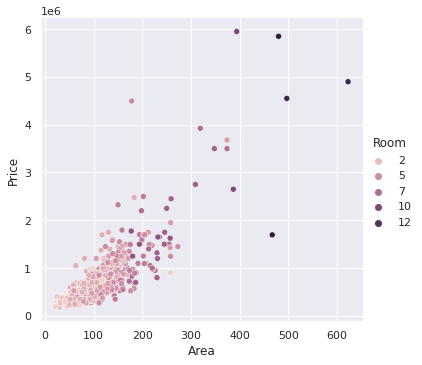

In [14]:
sns.relplot(x="Area", y="Price", hue="Room", data=df)
plt.show()

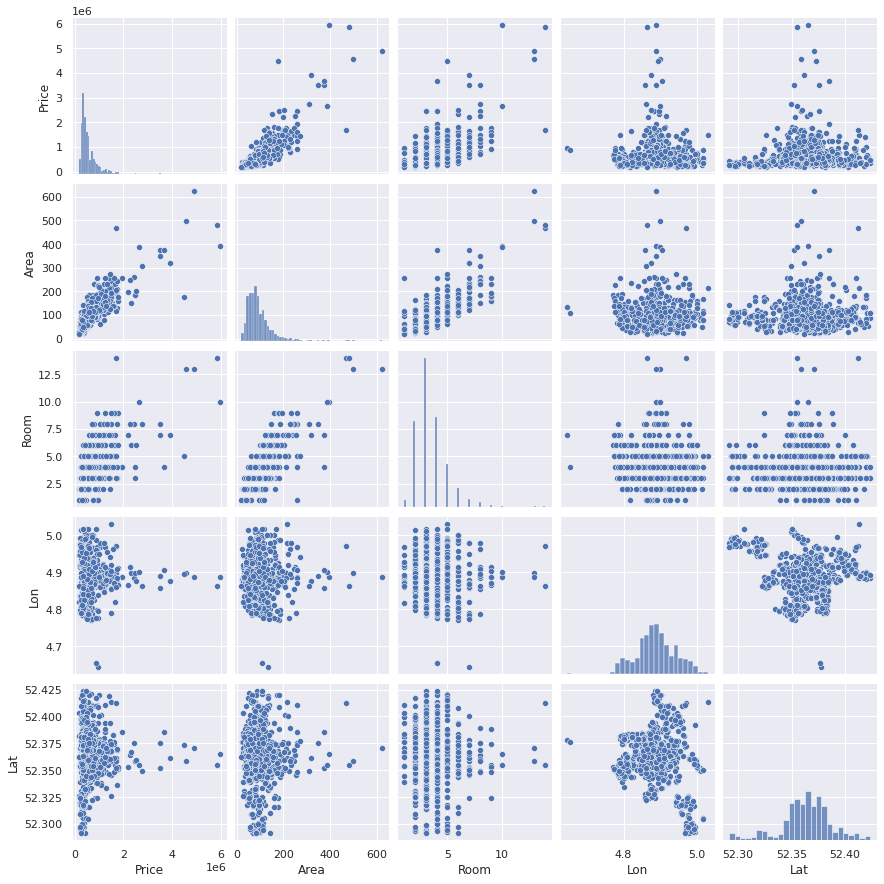

In [15]:
sns.pairplot(df)

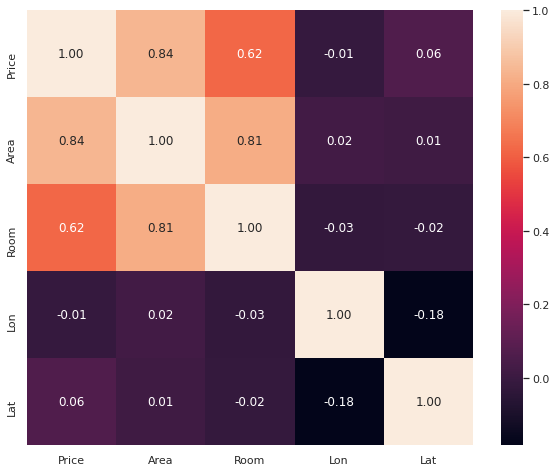

In [16]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost

In [18]:
X = df[['Area', 'Room', 'Lat','Lon']]
y = df[['Price']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [26]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regression.predict(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.72


In [29]:
# 72% aint that bad but there could be improvement if we should use a better model, perhaps multiple linear or polynomial should give us a higher coeffiient 